<a href="https://colab.research.google.com/github/mucahitozkaya/medical_cost_analysis/blob/main/medical_cost_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2. Importing Required Libraries**

In [136]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [137]:
data = pd.read_csv('/content/insurance.csv')
df = data.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [138]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [140]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**3. Perform An Exploratory Data Analysis**

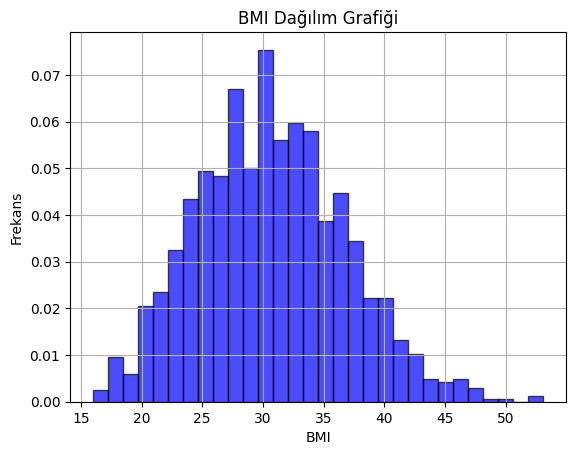

In [141]:
plt.hist(df['bmi'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('BMI Dağılım Grafiği')
plt.xlabel('BMI')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

#The BIM Scatterplot shows us that individuals mostly have a body mass index of 25-35.

<ipython-input-142-e63ad76f9496>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['bmi'], shade=True, color='blue')


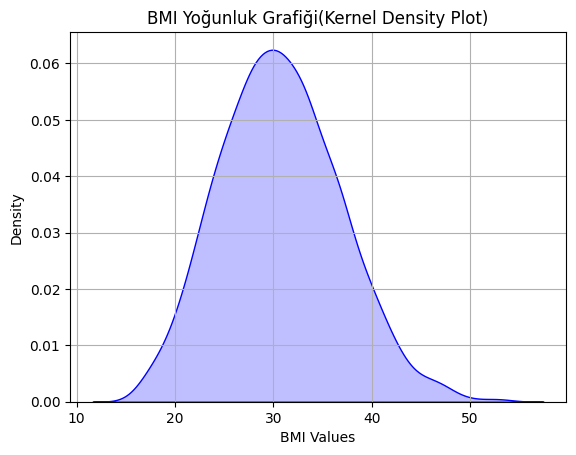

In [142]:
sns.kdeplot(df['bmi'], shade=True, color='blue')
plt.title('BMI Yoğunluk Grafiği(Kernel Density Plot)')
plt.xlabel('BMI Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#The BIM Scatterplot shows us that individuals mostly have a body mass index of 25-35.

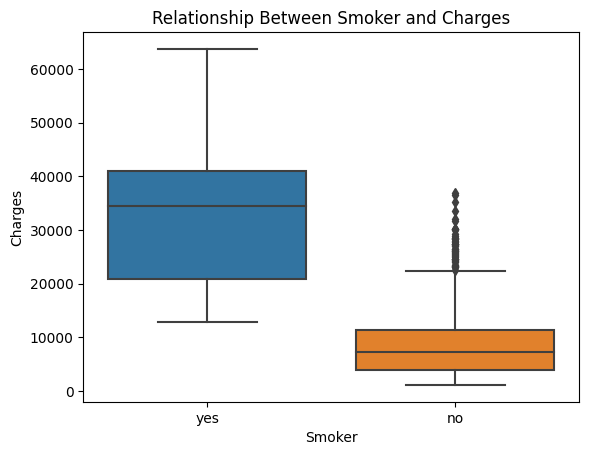

In [143]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Relationship Between Smoker and Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

#This polt show us smoker person pay more charges than non-smokers.

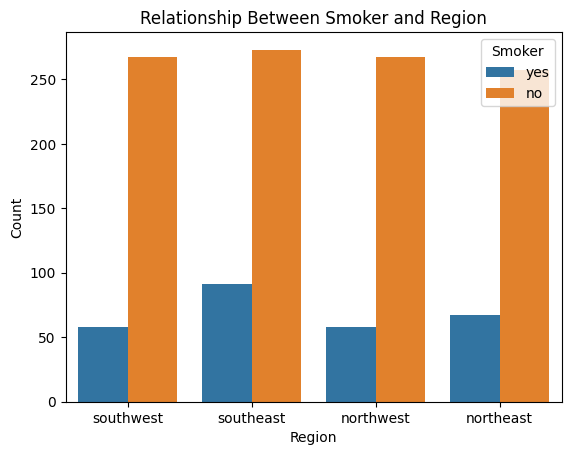

In [144]:
sns.countplot(x='region', hue='smoker', data=df)
plt.title('Relationship Between Smoker and Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.show()

#This plot show us number of smoker and non-smoker by region.

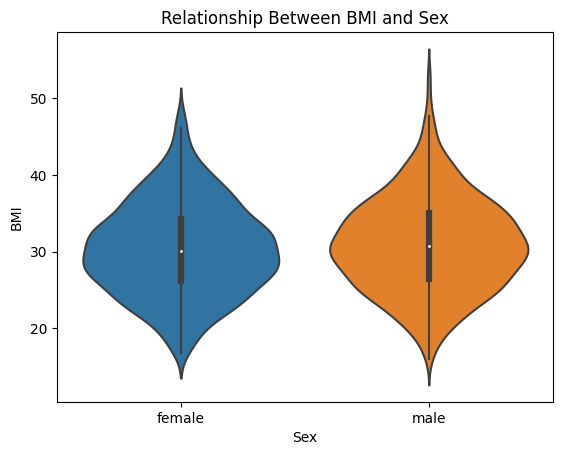

In [145]:
sns.violinplot(x='sex', y='bmi', data=df)
plt.title('Relationship Between BMI and Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

#This plot show us have similarity BMI by sex. But male have bigger BMI.

In [146]:
region_children_sum = df.groupby('region')['children'].sum()

most_children_region = region_children_sum.idxmax()
most_children_count = region_children_sum.max()

print(f"The region with the most children is '{most_children_region}' with {most_children_count} children.")

The region with the most children is 'southeast' with 382 children.


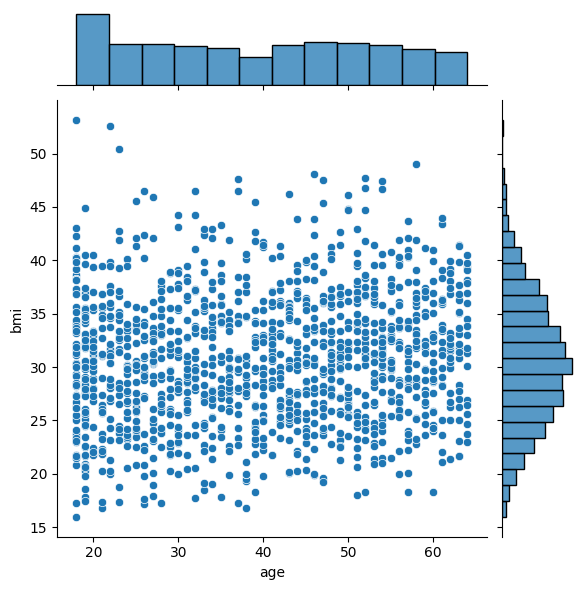

In [147]:
sns.jointplot(x='age', y='bmi', data=df, kind='scatter')
plt.show()

#This chart shows us the relationship between the ages of individuals and their body mass index.

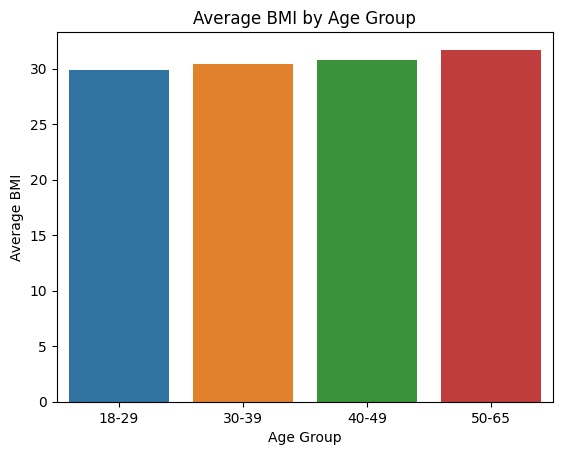

In [148]:
# Bin ages into groups (e.g., 18-29, 30-39, ...)
age_bins = [17, 30, 40, 50, 66]
age_labels = ['18-29', '30-39', '40-49', '50-65']
dfs = df.copy()
dfs['age_group'] = pd.cut(dfs['age'], bins=age_bins, labels=age_labels)

# Calculate average BMI for each age group
average_bmi_by_age = dfs.groupby('age_group')['bmi'].mean()

# Create a bar plot
sns.barplot(x=average_bmi_by_age.index, y=average_bmi_by_age.values)
plt.title('Average BMI by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.show()

#This chart show us the relationships between age group and average BMI of every age group.

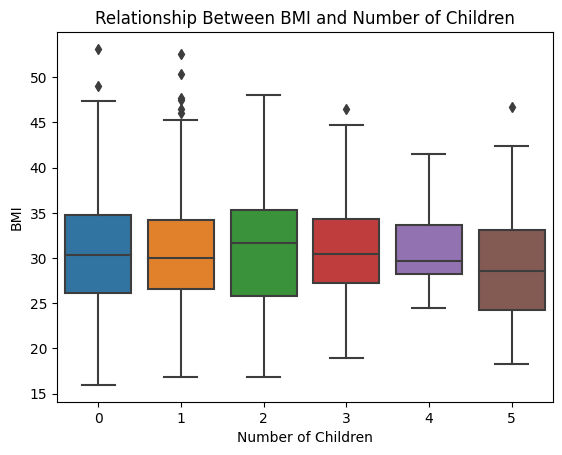

In [149]:
sns.boxplot(x='children', y='bmi', data=df)
plt.title('Relationship Between BMI and Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.show()

#This chart show us relationships between BMI and number children of individuals.

In [150]:
#The Interquartile Range (IQR) is a statistical measure used to understand the spread or dispersion of a dataset.
#It is based on the quartiles of a dataset and is particularly useful for identifying potential outliers or extreme values.


# Calculate IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define threshold for outliers
outlier_threshold = 1.5

# Identify outliers
outliers = df[(df['bmi'] < Q1 - outlier_threshold * IQR) | (df['bmi'] > Q3 + outlier_threshold * IQR)]

if len(outliers) > 0:
    print("There are outliers in the 'bmi' variable.")
    print(outliers)
else:
    print("No outliers found in the 'bmi' variable.")

There are outliers in the 'bmi' variable.
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


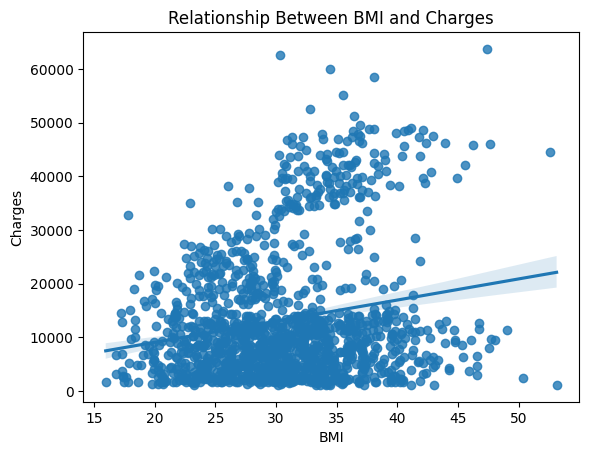

In [151]:
sns.regplot(x='bmi', y='charges', data=df)
plt.title('Relationship Between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

#This chart show us relationships between BMI and charges.

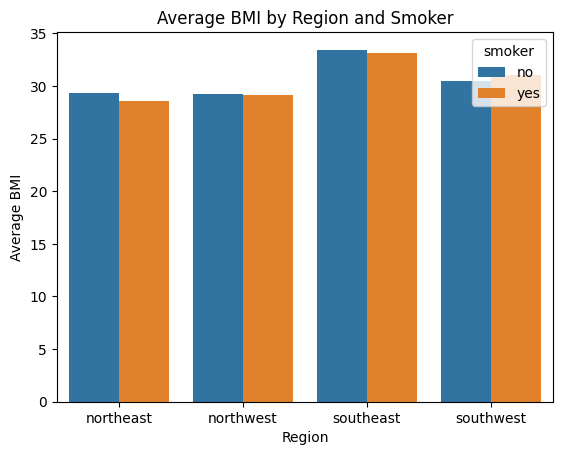

In [152]:
# Calculate average BMI values for each combination of region and smoker
average_bmi = df.groupby(['region', 'smoker'])['bmi'].mean().reset_index()

# Create a grouped bar plot
sns.barplot(x='region', y='bmi', hue='smoker', data=average_bmi)
plt.title('Average BMI by Region and Smoker')
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.show()

#This chart show us relationships between average BMI by region and Smoker.

**4. Data Preprocessing**

In [153]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [154]:
#Use Label Encoding techniques to deal with categorical variables.


df["sex"] = df["sex"].replace(["female"],1)
df["sex"] = df["sex"].replace(["male"],0)

df["smoker"] = df["smoker"].replace(["yes"],1)
df["smoker"] = df["smoker"].replace(["no"],0)

df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [155]:
#Use One-Hot Encoding techniques to deal with categorical variables.


df = pd.get_dummies(df, columns=['region'])

df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [157]:
#Split your dataset into X_train,X_test, y_train, y_test.


X = df.loc[:, [col for col in df.columns.values if col != 'charges']]

X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0
1334,18,1,31.920,0,0,1,0,0,0
1335,18,1,36.850,0,0,0,0,1,0
1336,21,1,25.800,0,0,0,0,0,1


In [158]:
#Split your dataset into X_train,X_test, y_train, y_test.


y = df.loc[:,'charges']

y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [159]:
#Split your dataset into X_train,X_test, y_train, y_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [160]:
#Scale the dataset by normalizing it(Min-Max Scaling or Standard Scaling).

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [161]:
X_train_scaled

array([[0.60869565, 1.        , 0.10734463, ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 1.        , 0.22491256, ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 1.        , 0.23944041, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.        , 0.24791499, ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 1.        , 0.85122411, ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.        , 0.37503363, ..., 0.        , 0.        ,
        1.        ]])

In [162]:
X_test_scaled

array([[0.58695652, 1.        , 0.24791499, ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 1.        , 0.37826204, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.29391983, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43478261, 0.        , 0.32458972, ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 1.        , 0.84611246, ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 1.        , 0.49071832, ..., 0.        , 0.        ,
        1.        ]])

**5. Model Selection**

In [163]:
#Select several regression models and train them with the preprocessed data.
#Examine the performances of the selected models using cross validation.
#Choose the best performing model

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error


linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='linear')
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)



linear_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)


# List of selected models
models = [linear_model, rf_model, svr_model, gb_model]

# We define the scoring metric (e.g., negative mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# We perform cross-validation for each model
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=scorer)
    avg_score = -scores.mean()  # Convert negative MSE back to positive
    print(f"Model: {model.__class__.__name__}, Average MSE: {avg_score:.2f}")


#The best model is Gradient Boosting Regressor because of lowest average mse value.

Model: LinearRegression, Average MSE: 37887399.71
Model: RandomForestRegressor, Average MSE: 24267189.46
Model: SVR, Average MSE: 157132452.16
Model: GradientBoostingRegressor, Average MSE: 22440128.40


**6. Hyper-parameter Optimization**

In [164]:
#Optimize the hyper-parameters of the model selected in the previous step.
#Optimize parameters with Grid Search. (Grid Search or Randomized Search)


from sklearn.model_selection import GridSearchCV

# 1. We adjust the GradientBoostingRegressor model with hyperparameter optimization
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_model = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 2. We find the best combination of hyperparameters with the Grid Search method
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_model = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# We evaluate the best model using test data
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print("1. En İyi Hiperparametreler:", best_params)
print("1. Test MSE with Best Model:", mse)

1. En İyi Hiperparametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
1. Test MSE with Best Model: 18597719.942383945


**7. Model Evaluation**

In [165]:
# We evaluate the optimized model using regression model evaluation metrics. (Ex. Mean Squared Error, Mean Absolute Error etc.)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# We calculate different regression evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 18597719.942383945
Mean Absolute Error (MAE): 2455.8111180978976
R-squared (R2): 0.8802069442778705
